In [1]:
'''
- 분석주제명 
목적 : 판매하는 상품의 타켓 고객에게 광고를 할때 어떤 요일/시간대가 적합한가?

- 분석배경(주제선정 이유)
19년(코로나 이전), 20년(코로나 유행 초기), 21년(코로나 유행 1년 경과)의 온라인쇼핑 데이터를 활용하여 코로나를 전후로 외부활동, 취미활동 등 야외활동에 대한 제한이 있던 상황과 아닌 상황에서 연령대별 주문 건수와 카테고리별 주문 건수를 분석하고 앞으로 온라인 쇼핑 시장의 미래를 예측해보고자 합니다.

- 분석목적(분석가설)
1. 평일휴일->다음날이 평일or휴일인 날의 소비 경향(4가지 case)
  1) 당일이 평일이고 다음날이 평일or휴일
  2) 당일이 휴일이고 다음날이 평일or휴일
: 다음날이 평일인 경우와 휴일인 경우를 비교하면 후자의 구매건수가 더 많을 것이다.

2. 시간대->오전/오후로 나눠서 분석(퇴근시간 생각)
: 보통 09~18시까지 업무시간이고  퇴근 후 개인시간을 보내기 때문에 거래건수가 오전보다는 오후에 많을 것이다.

3. 연령대, TAG->실내/외, 생필품/사치 … 다양한 그룹으로 나누고 연령별로 나눠서 분석(MZ세대의 소비 성향)
: 20대는 실용적이고 꼭 필요한 제품(생필품)을 구매하기 보다는 개인의 욕구를 충족시키기 위한 제품(사치품)을 30,40,50대 보다 많이 구매할 것이다. 
코로나 이후 실외활동에 필요한 제품보다는 실내활동에 필요한 제품의 주문 건수가 늘었을 것이다.

5. CRI_YM->19년/20년/21년 코로나 유행을 기준으로 나누어 분석
: 19~20년 사이에 온라인 쇼핑 건수가 최고로 많고 해가 지날수록 줄어들 것이다.

- 데이터건수
21558건

- 데이터 제공 사이트
한국데이터거래소(온라인쇼핑 요일/시간대별 이용 특징)
'''

'\n-\xa0분석주제명\xa0\n목적 : 판매하는 상품의 타켓 고객에게 광고를 할때 어떤 요일/시간대가 적합한가?\n\n-\xa0분석배경(주제선정\xa0이유)\n19년(코로나 이전), 20년(코로나 유행 초기), 21년(코로나 유행 1년 경과)의 온라인쇼핑 데이터를 활용하여 코로나를 전후로 외부활동, 취미활동 등 야외활동에 대한 제한이 있던 상황과 아닌 상황에서 연령대별 주문 건수와 카테고리별 주문 건수를 분석하고 앞으로 온라인 쇼핑 시장의 미래를 예측해보고자 합니다.\n\n-\xa0분석목적(분석가설)\n1. 평일휴일->다음날이 평일or휴일인 날의 소비 경향(4가지 case)\n  1) 당일이 평일이고 다음날이 평일or휴일\n  2) 당일이 휴일이고 다음날이 평일or휴일\n: 다음날이 평일인 경우와 휴일인 경우를 비교하면 후자의 구매건수가 더 많을 것이다.\n\n2. 시간대->오전/오후로 나눠서 분석(퇴근시간 생각)\n: 보통 09~18시까지 업무시간이고 \xa0퇴근 후 개인시간을 보내기 때문에 거래건수가 오전보다는 오후에 많을 것이다.\n\n3. 연령대, TAG->실내/외, 생필품/사치 … 다양한 그룹으로 나누고 연령별로\xa0나눠서 분석(MZ세대의 소비 성향)\n: 20대는 실용적이고 꼭 필요한 제품(생필품)을 구매하기 보다는 개인의 욕구를 충족시키기 위한 제품(사치품)을 30,40,50대 보다 많이 구매할 것이다.\xa0\n코로나 이후 실외활동에 필요한 제품보다는 실내활동에 필요한 제품의 주문 건수가 늘었을 것이다.\n\n5. CRI_YM->19년/20년/21년 코로나 유행을 기준으로 나누어 분석\n: 19~20년 사이에 온라인 쇼핑 건수가 최고로 많고 해가 지날수록 줄어들 것이다.\n\n-\xa0데이터건수\n21558건\n\n-\xa0데이터\xa0제공\xa0사이트\n한국데이터거래소(온라인쇼핑\xa0요일/시간대별\xa0이용\xa0특징)\n'

### 라이브러리 가져오기

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
rc('font', family='AppleGothic')

import warnings
warnings.filterwarnings('ignore')

### 데이터 불러오기

In [3]:
df=pd.read_excel('/Users/supersong/Documents/python/data/onlineshopping_data.xlsx')

### 데이터 탐색하기

In [4]:
df.head()

,CRI_YM,TAG,평일휴일,요일,시간대,성별,연령대,건수합계
0,201905,유아용품,평일,목,B.06-10시,F,A.2O대,291
1,202005,생활/사무용품,평일,월,D.14-18시,M,C.4O대,6225
2,201905,골프용품,휴일,일,F.22-02시,M,B.3O대,51
3,202105,화장품,휴일,일,D.14-18시,F,C.4O대,3564
4,202005,인테리어,평일,월,C.10-14시,F,D.5O대,1101


* 데이터가 년도, 카테고리, 평일휴일, 요일, 시간대, 성별, 연령대 별로 건수의 합계를 보여줌. 집계된 데이터임을 확인

In [5]:
df.shape

(21557, 8)

* 21557개의 행과 8개의 열로 이루어져있음

In [6]:
# 컬럼명을 영어로 변경(한글이 깨질 수도 있기 때문에 컬럼명을 영어로 변경)
df.columns=['YM','CATEGORY','HOLIDAY','DAY','HOUR','SEX','AGE','COUNT']

In [7]:
# 영어 컬럼명 확인
df.columns

Index(['YM', 'CATEGORY', 'HOLIDAY', 'DAY', 'HOUR', 'SEX', 'AGE', 'COUNT'], dtype='object')

In [8]:
# 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21557 entries, 0 to 21556
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   YM        21557 non-null  int64 
 1   CATEGORY  21557 non-null  object
 2   HOLIDAY   21557 non-null  object
 3   DAY       21557 non-null  object
 4   HOUR      21557 non-null  object
 5   SEX       21557 non-null  object
 6   AGE       21557 non-null  object
 7   COUNT     21557 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 1.3+ MB


* 데이터 타입이 int과 object로 이루어져있음

In [9]:
# 결측치 확인
df.isnull().sum()

YM          0
CATEGORY    0
HOLIDAY     0
DAY         0
HOUR        0
SEX         0
AGE         0
COUNT       0
dtype: int64

* 모든 컬럼에 결측치가 존재하지 않음을 확인

In [10]:
# 데이터 타입별 유니크한 value값(샘플) 및 개수 확인
for col in df.select_dtypes('int64').columns.tolist():
    print(df[col].name)
    print('유니크값 개수 :' ,df[col].nunique())
    print('유니크값 샘플 :', df[col].unique()[0:3])
    print('------------------------------')

YM
유니크값 개수 : 3
유니크값 샘플 : [201905 202005 202105]
------------------------------
COUNT
유니크값 개수 : 4135
유니크값 샘플 : [ 291 6225   51]
------------------------------


In [11]:
for col in df.select_dtypes('object').columns.tolist():
    print(df[col].name)
    print('유니크값 개수 :' ,df[col].nunique())
    print('유니크값 샘플 :', df[col].unique()[0:15])
    print('------------------------------')

CATEGORY
유니크값 개수 : 14
유니크값 샘플 : ['유아용품' '생활/사무용품' '골프용품' '화장품' '인테리어' '식료품' '서적' '홈쇼핑' '가전' '차량정비_부품'
 '취미용품' '애완용품' '패션' '스포츠의류용품']
------------------------------
HOLIDAY
유니크값 개수 : 2
유니크값 샘플 : ['평일' '휴일']
------------------------------
DAY
유니크값 개수 : 7
유니크값 샘플 : ['목' '월' '일' '토' '화' '수' '금']
------------------------------
HOUR
유니크값 개수 : 6
유니크값 샘플 : ['B.06-10시' 'D.14-18시' 'F.22-02시' 'C.10-14시' 'A.02-06시' 'E.18-22시']
------------------------------
SEX
유니크값 개수 : 2
유니크값 샘플 : ['F' 'M']
------------------------------
AGE
유니크값 개수 : 5
유니크값 샘플 : ['A.2O대' 'C.4O대' 'B.3O대' 'D.5O대' 'E.60대이상']
------------------------------


### 데이터 변환하기

In [12]:
# object 데이터 타입의 데이터 값을 수치형으로 변경
# CATEGORY
CATEGORY=df['CATEGORY']
CATEGORY.unique()

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

CATEGORY=CATEGORY.values.reshape((-1,1))
CATEGORYle=le.fit_transform(CATEGORY)

df['CATEGORY']=CATEGORYle.reshape((-1,1))
print(df['CATEGORY'])
print(le.classes_)

0         7
1         2
2         1
3        13
4         8
         ..
21552    11
21553     1
21554     4
21555     8
21556     7
Name: CATEGORY, Length: 21557, dtype: int64
['가전' '골프용품' '생활/사무용품' '서적' '스포츠의류용품' '식료품' '애완용품' '유아용품' '인테리어' '차량정비_부품'
 '취미용품' '패션' '홈쇼핑' '화장품']


* Label Encoding : 범주형 변수의 각 값에 고유한 정수를 부여 

['가전' '골프용품' '생활/사무용품' '서적' '스포츠의류용품' '식료품' '애완용품' '유아용품' '인테리어' '차량정비_부품'
 '취미용품' '패션' '홈쇼핑' '화장품'] 
 
 순서로 0~13으로 지정

In [13]:
# HOLIDAY(0:평일/1:휴일)
df['HOLIDAY'].loc[df['HOLIDAY']=='평일']=0
df['HOLIDAY'].loc[df['HOLIDAY']=='휴일']=1

# DAY(0~6:월~일)
df['DAY'].loc[df['DAY']=='월']=0
df['DAY'].loc[df['DAY']=='화']=1
df['DAY'].loc[df['DAY']=='수']=2
df['DAY'].loc[df['DAY']=='목']=3
df['DAY'].loc[df['DAY']=='금']=4
df['DAY'].loc[df['DAY']=='토']=5
df['DAY'].loc[df['DAY']=='일']=6

# HOUR(0:02-06/1:06-10/2:10-14/3:14-18/4:18-22/5:22-02)
df['HOUR'].loc[df['HOUR']=='A.02-06시']=0
df['HOUR'].loc[df['HOUR']=='B.06-10시']=1
df['HOUR'].loc[df['HOUR']=='C.10-14시']=2
df['HOUR'].loc[df['HOUR']=='D.14-18시']=3
df['HOUR'].loc[df['HOUR']=='E.18-22시']=4
df['HOUR'].loc[df['HOUR']=='F.22-02시']=5

# SEX(0:여/1:남)
df['SEX'].loc[df['SEX']=='F']=0
df['SEX'].loc[df['SEX']=='M']=1

# AGE(20~50:20대~50대/60:60대이상)
df['AGE'].loc[df['AGE']=='A.2O대']=20
df['AGE'].loc[df['AGE']=='B.3O대']=30
df['AGE'].loc[df['AGE']=='C.4O대']=40
df['AGE'].loc[df['AGE']=='D.5O대']=50
df['AGE'].loc[df['AGE']=='E.60대이상']=60

In [14]:
df[['HOLIDAY','DAY','HOUR','SEX','AGE']]=df[['HOLIDAY','DAY','HOUR','SEX','AGE']].astype('int')

* 나머지 object 데이터 타입의 데이터 값을 수치형으로 변경

### 파생변수 생성

In [15]:
# CORONA 변수 생성 [0:19년05월(코로나 이전)/1:20년05월(코로나 유행 초기)/2:21년05월(코로나 유행 1년 경과)]
df['CORONA']=np.nan
df['CORONA'].loc[df['YM']==201905]=0
df['CORONA'].loc[df['YM']==202005]=1
df['CORONA'].loc[df['YM']==202105]=2

df['CORONA']=df['CORONA'].astype('int')

In [16]:
# AMPM 변수 생성 [시간대->오전(0,1,2)/오후(3,4,5)로 나눔]
# 0:02-06/1:06-10/2:10-14/3:14-18/4:18-22/5:22-02
AM=[0,1,2]
PM=[3,4,5]

df['AMPM']=np.nan
df['AMPM'].loc[df['HOUR'].isin(AM)]=0
df['AMPM'].loc[df['HOUR'].isin(PM)]=1

df['AMPM']=df['AMPM'].astype('int')

In [17]:
# GENERATION 변수 생성 [0:z세대(20)(1997년생~)/1:밀레니얼 세대(30)(1981~1996년생)/2:x세대(40~50)(1965~1980년생)/3:베이비붐세대(60)(1946~1964년생)]

df['GENERATION']=np.nan
df['GENERATION'].loc[df['AGE']==20]=0
df['GENERATION'].loc[df['AGE']==30]=1
df['GENERATION'].loc[(df['AGE']==40)|(df['AGE']==50)]=2
df['GENERATION'].loc[df['AGE']==60]=3

df['GENERATION']=df['GENERATION'].astype('int')

In [18]:
# NECESSITY 변수 생성 [생필품:(0,2,5,6,7,9,12,13)/사치품:(1,3,4,8,10,11)]
# 생필품 : 가전, 생활/사무용품, 식료품, 애완용품, 유아용품, 차량정비_부품, 홈쇼핑, 화장품
# 사치품 : 골프용품, 서적, 스포츠의류용품, 인테리어, 취미용품, 패션
necessity=[0,2,5,6,7,9,12,13]
luxury=[1,3,4,8,10,11]

df['NECESSITY']=np.nan
df['NECESSITY'].loc[df['CATEGORY'].isin(necessity)]=0
df['NECESSITY'].loc[df['CATEGORY'].isin(luxury)]=1

df['NECESSITY']=df['NECESSITY'].astype('int')

### 이상치 처리

{'whiskers': [<matplotlib.lines.Line2D at 0x7f861ae04f40>,
 'caps': [<matplotlib.lines.Line2D at 0x7f861ae16520>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f861ae04d90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f861ae16ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f861ae16d90>],
 'means': []}

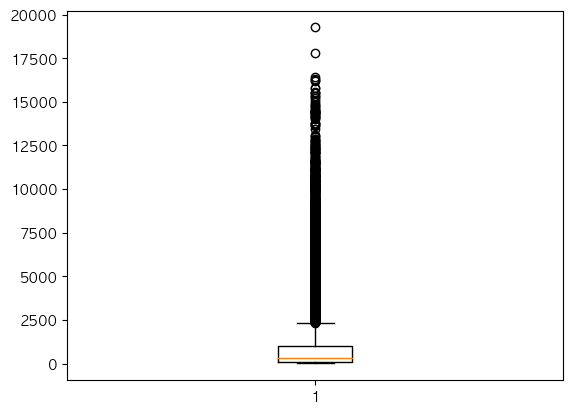

In [228]:
plt.boxplot(df['COUNT'])

In [239]:
df['COUNT'].sort_values(ascending=False)

20783    19261
4693     17797
11543    16402
8709     16281
6172     16258
         ...  
14978        3
10693        3
13959        3
8491         3
10976        3
Name: COUNT, Length: 21557, dtype: int64

* 온라인쇼핑 데이터에서 수치형 데이터인 COUNT컬럼의 값만 확인했지만 집계된 데이터(거래건수합계)라 이상치 처리X.

## 단변량분석

### - YM, CATEGORY, HOLIDAY, DAY, HOUR, SEX, AGE

<AxesSubplot:xlabel='DAY', ylabel='count'>

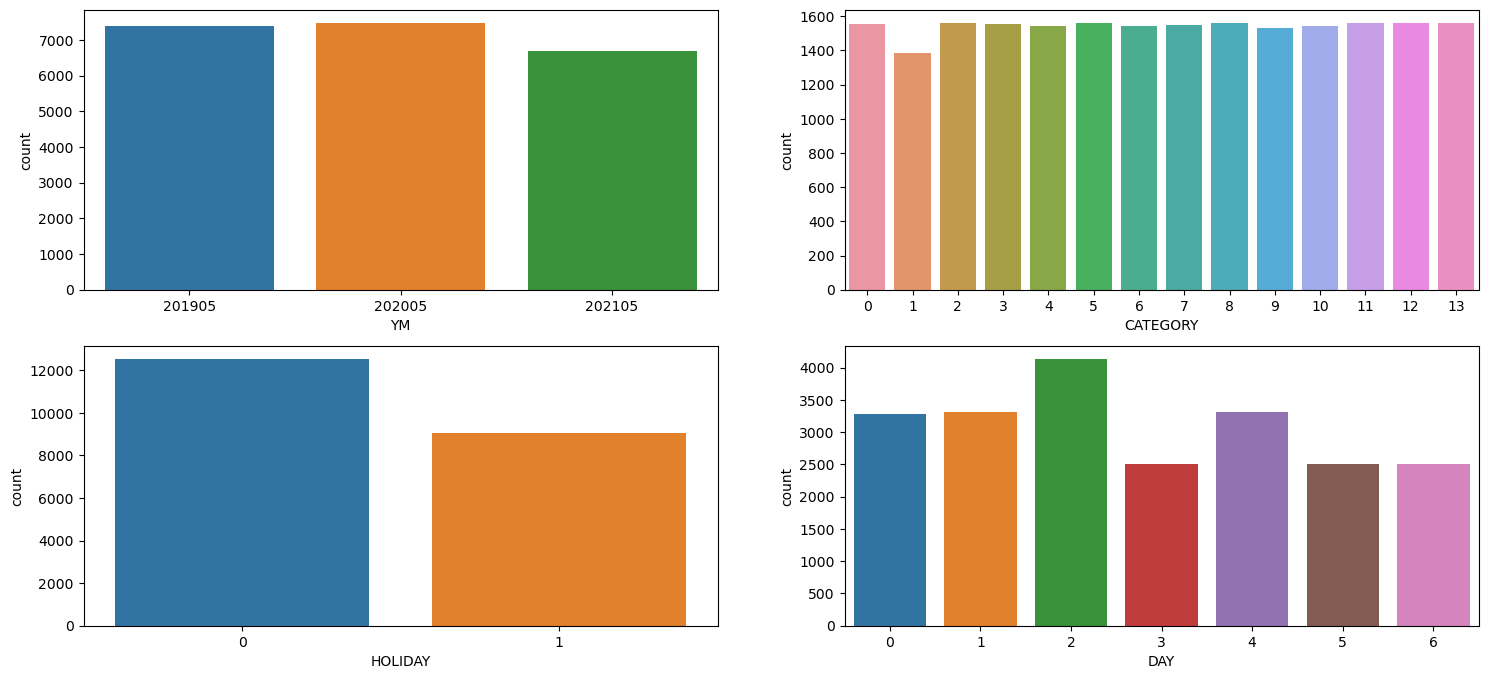

In [19]:
# YM, CATEGORY, HOLIDAY, DAY
plt.figure(figsize=(18,8))

plt.subplot(2,2,1)
sns.countplot(df['YM'])
plt.subplot(2,2,2)
sns.countplot(df['CATEGORY'])
plt.subplot(2,2,3)
sns.countplot(df['HOLIDAY'])
plt.subplot(2,2,4)
sns.countplot(df['DAY'])

* YM : 세개의 년도를 비교하였을때 비슷한 데이터수가 나올것이라 예상했지만, 21년도의 데이터수가 19,20년도 데이터수보다 작음을 확인.
>- 19년도 5월 공휴일(어린이날:월,근로자의날:수)/20년도 5월 공휴일(어린이날:화,근로자의날:금)/21년도 5월 공휴일(어린이날,부처님오신날:수)
>- 19,20년도 공휴일은 겹치지 않는 요일로 2개의 평일의 데이터에 추가되었고 21년도 5월 공휴일은 겹치는 요일로 1개의 평일의 데이터에 추가됨.
>- 그래서 공휴일이면서 평일 하루의 데이터만큼 2021년도 데이터 수가 차이남.
* CATEGORY : 0~13까지의 카테고리 데이터수를 비교하였을때, 1(골프용품)의 데이터수가 작음을 확인.
>- 골프용품을 구매하지 않는 연령대나 시간대가 존재할 것으로 예상.
* HOLIDAY : 월화수목금(평일), 토일(휴일)로 생각하여 데이터수가 5:2를 예상했지만 공휴일이 휴일에 포함되어 데이터수가 4:3으로 나타남.
>- 평일이면서 공휴일인 경우가 존재할 것으로 예상.
* DAY : 목토일(3,5,6), 월화금(0,1,4), 수(2) 순서로 데이터수가 많음.
>- 19년도 5월 공휴일(어린이날:월,근로자의날:수)/20년도 5월 공휴일(어린이날:화,근로자의날:금)/21년도 5월 공휴일(어린이날,부처님오신날:수)
>- 요일별 추가된 공휴일 : 월(19년도), 화(20년도), 수(19,21년도), 금(20년도)이므로 목토일, 월화금, 수요일 순서로 데이터수가 많음.

<AxesSubplot:xlabel='AGE', ylabel='count'>

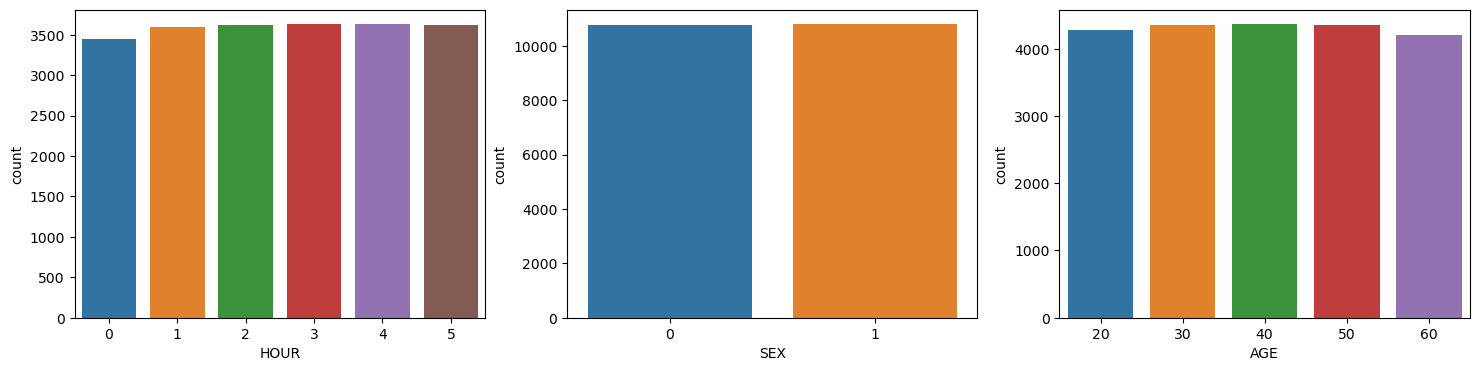

In [20]:
# HOUR, SEX, AGE
plt.figure(figsize=(18,4))

plt.subplot(1,3,1)
sns.countplot(df['HOUR'])
plt.subplot(1,3,2)
sns.countplot(df['SEX'])
plt.subplot(1,3,3)
sns.countplot(df['AGE'])

* HOUR : 02-06 시간대의 데이터수가 다른 시간대 데이터수보다 적음을 확인.
>- 02-06 시간대에 거래를 하지않은 카테고리나 연령대가 있을 것으로 예상.
* SEX : 남녀의 데이터수가 비슷함을 확인.


* AGE : 40대>30대>50대>20대>60대이상 순으로 나이대별 데이터수가 차이남을 확인.

## 다변량 분석

### - 카테고리/년도별 거래건수 분석

In [214]:
CAT_19=df.loc[df['YM']==201905]['COUNT'].groupby(df['CATEGORY']).sum()
CAT_20=df.loc[df['YM']==202005]['COUNT'].groupby(df['CATEGORY']).sum()
CAT_21=df.loc[df['YM']==202105]['COUNT'].groupby(df['CATEGORY']).sum()

diff_1920=CAT_20-CAT_19 #카테고리별 19,20년도 차이
diff_1921=CAT_21-CAT_19 #카테고리별 19,21년도 차이
diff_2021=CAT_21-CAT_20 #카테고리별 20,21년도 차이

percent_1920=round((CAT_20-CAT_19)/CAT_19*100,2) #카테고리별 19,20년도 증감률
percent_1921=round((CAT_21-CAT_19)/CAT_19*100,2) #카테고리별 19,21년도 증감률
percent_2021=round((CAT_21-CAT_20)/CAT_20*100,2) #카테고리별 20,21년도 증감률

# 년도별 건수차이 및 증감률 데이터프레임
percent_change_ym=pd.DataFrame({'TAG':le.classes_.reshape(-1),
                                'diff_1920':diff_1920,
                                'diff_1921':diff_1921,
                                'diff_2021':diff_2021,
                                'percent_1920':percent_1920,
                                'percent_1921':percent_1921,
                                'percent_2021':percent_2021})
percent_change_ym

,TAG,diff_1920,diff_1921,diff_2021,percent_1920,percent_1921,percent_2021
CATEGORY,,,,,,,
0,가전,116914,219580,102666,41.02,77.03,25.54
1,골프용품,13147,17284,4137,87.09,114.49,14.65
2,생활/사무용품,464417,689844,225427,61.16,90.85,18.42
3,서적,40912,61812,20900,18.72,28.28,8.06
4,스포츠의류용품,53349,64981,11632,54.61,66.52,7.70
5,식료품,421540,798901,377361,65.60,124.32,35.46
6,애완용품,36256,56602,20346,57.90,90.39,20.58
7,유아용품,29114,49501,20387,18.42,31.31,10.89
8,인테리어,163161,201941,38780,73.30,90.72,10.05


* 카테고리,년도별 건수 차이 및 증감률을 데이터프레임으로 재구성
* 모든 카테고리에서 거래건수가 큰 폭으로 상승함.
* 20/21년도 온라인쇼핑 시장이 아직 커지고 있지만, 19/20년도와 비교하면 건수차이가 점차 줄고있고 성장도 더디게 될 것으로 예상.

Text(0.5, 0, 'Percent')

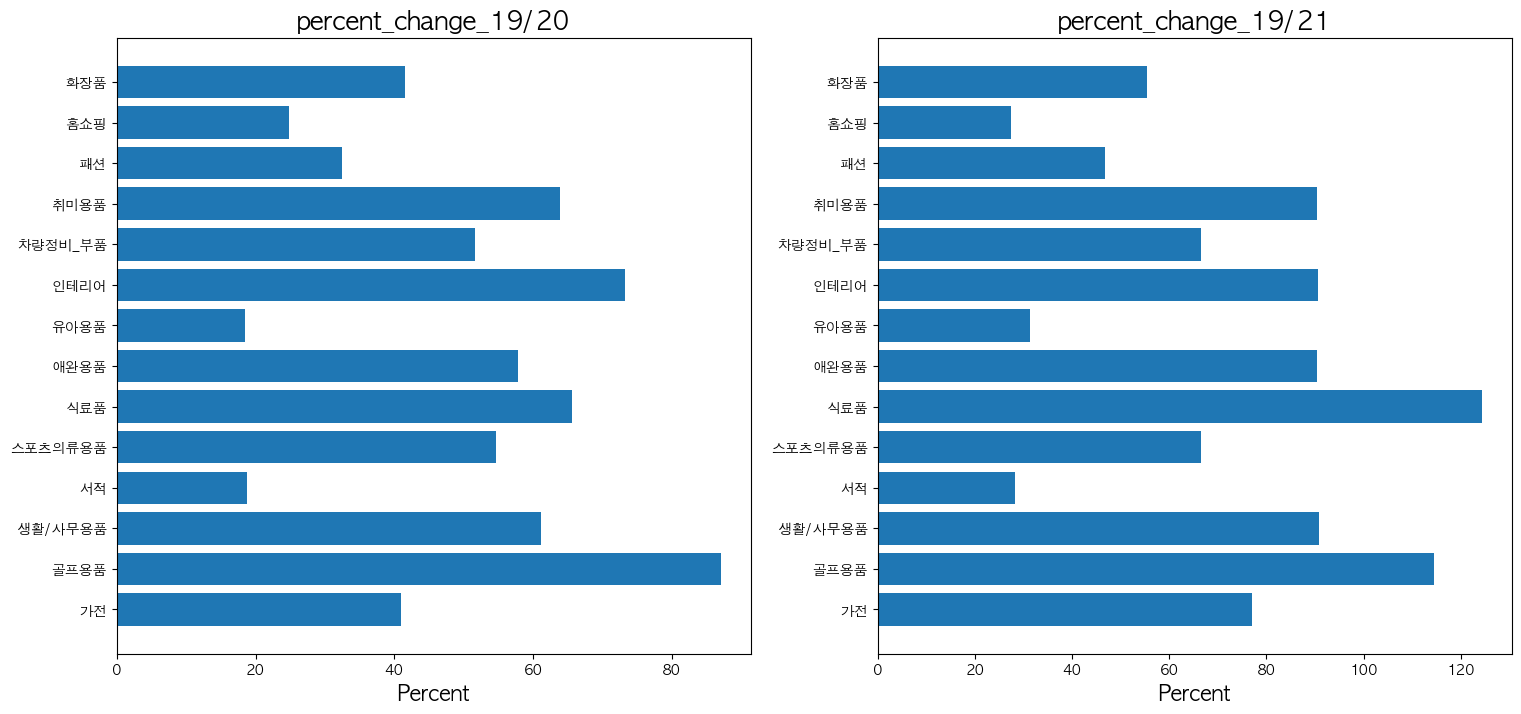

In [215]:
# 19/20, 19/21 증감률 시각화
plt.figure(figsize=(18,8))

plt.subplot(1,2,1)
plt.barh(percent_change_ym['TAG'], percent_change_ym['percent_1920'])
plt.title('percent_change_19/20', fontsize=18)
plt.xlabel('Percent', fontsize=15)
plt.subplot(1,2,2)
plt.barh(percent_change_ym['TAG'], percent_change_ym['percent_1921'])
plt.title('percent_change_19/21', fontsize=18)
plt.xlabel('Percent', fontsize=15)

* 19/20년도 그래프에서 골프용품>인테리어>식료품 순으로 증감률이 높았으며, 19/21년도 그래프에서는 식료품>골프용품>생활/사무용품 순으로 증감률이 높음.
* 두 그래프에서 골프용품과 식료품의 증감률은 높은 편으로 나타남.
* 19년도 식료품과 골프용품의 거래건수가 21년도에서 2배 이상 증가함.

In [240]:
#1주차#

### - 카테고리/시간대별 거래건수 분석

In [225]:
# 시간대/카테고리별 분석 및 시각화
CAT_TOT=df['COUNT'].groupby(df['CATEGORY']).sum()
CAT_A=df.loc[df['HOUR']==0]['COUNT'].groupby(df['CATEGORY']).sum()
CAT_B=df.loc[df['HOUR']==1]['COUNT'].groupby(df['CATEGORY']).sum()
CAT_C=df.loc[df['HOUR']==2]['COUNT'].groupby(df['CATEGORY']).sum()
CAT_D=df.loc[df['HOUR']==3]['COUNT'].groupby(df['CATEGORY']).sum()
CAT_E=df.loc[df['HOUR']==4]['COUNT'].groupby(df['CATEGORY']).sum()
CAT_F=df.loc[df['HOUR']==5]['COUNT'].groupby(df['CATEGORY']).sum()

# 시간대별 증감률 데이터프레임
percent_change_hour=pd.DataFrame({'TAG':le.classes_.reshape(-1),
                                'HOUR_0206':round(CAT_A/CAT_TOT*100,2),
                                'HOUR_0610':round(CAT_B/CAT_TOT*100,2),
                                'HOUR_1014':round(CAT_C/CAT_TOT*100,2),
                                'HOUR_1418':round(CAT_D/CAT_TOT*100,2),
                                'HOUR_1822':round(CAT_E/CAT_TOT*100,2),
                                'HOUR_2202':round(CAT_F/CAT_TOT*100,2)})
percent_change_hour

,TAG,HOUR_0206,HOUR_0610,HOUR_1014,HOUR_1418,HOUR_1822,HOUR_2202
CATEGORY,,,,,,,
0,가전,2.46,13.55,27.15,22.41,19.25,15.18
1,골프용품,2.35,11.97,25.26,24.03,20.06,16.32
2,생활/사무용품,2.85,12.39,25.62,23.44,19.14,16.56
3,서적,2.39,10.63,26.09,22.76,20.68,17.45
4,스포츠의류용품,3.43,10.12,24.05,22.40,20.25,19.74
5,식료품,2.72,11.22,23.70,21.54,22.60,18.23
6,애완용품,3.51,11.30,23.60,21.40,21.44,18.76
7,유아용품,3.45,10.75,23.69,20.77,19.77,21.56
8,인테리어,3.20,10.39,23.70,23.73,20.70,18.29


<BarContainer object of 14 artists>

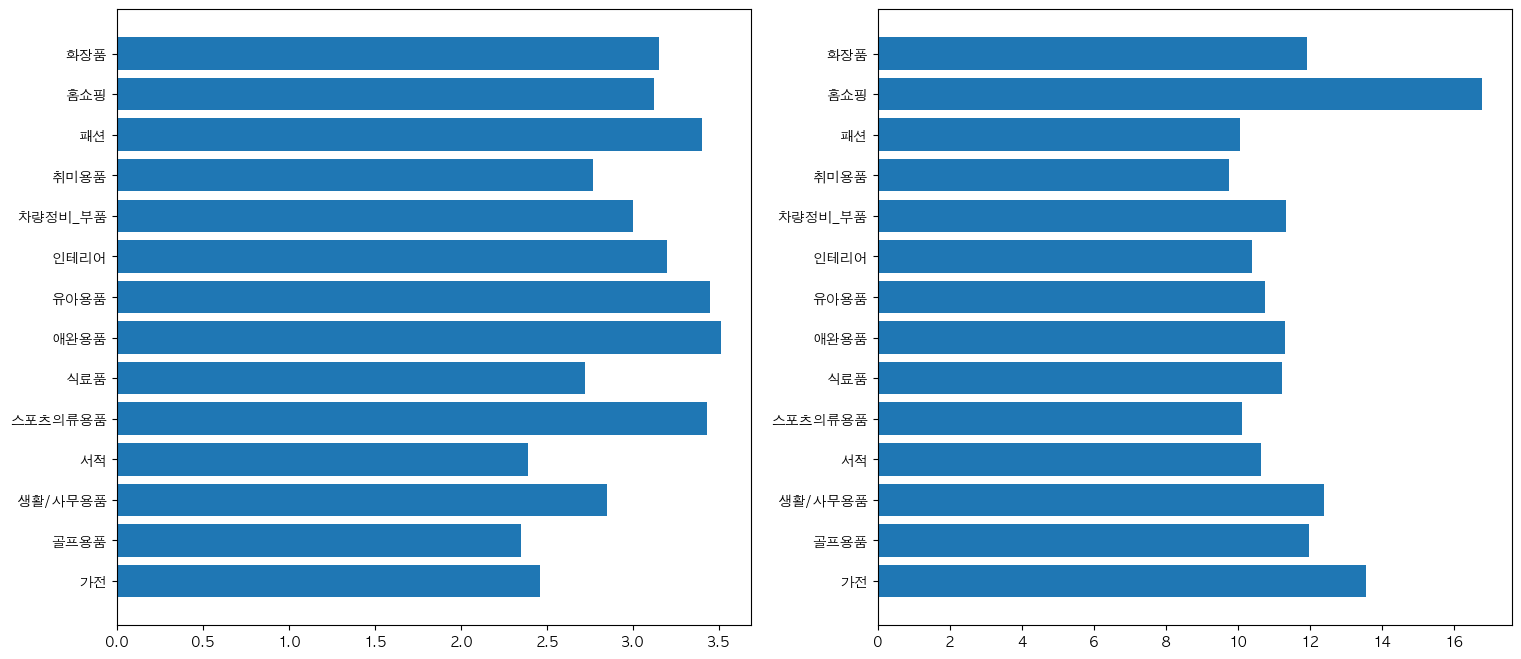

In [223]:
# 각 카테고리의 시간대별 증감률 시각화(보완)
plt.figure(figsize=(18,8))

plt.subplot(1,2,1)
plt.barh(percent_change_hour['TAG'], percent_change_hour['HOUR_0206'])


plt.subplot(1,2,2)
plt.barh(percent_change_hour['TAG'], percent_change_hour['HOUR_0610'])


In [28]:
# 년도별로 평일에 공휴일인 날짜가 있고 요일별로 집계가 되어 있어서 평일이면서 휴일인 데이터를 특정할수 없음.
# 년도별로 공휴일 요일이 다르기 때문에 다음날이 평일/휴일인 날을 파악해야함.
v=[0,1,2,3,4]
df.loc[(df['HOLIDAY']==1)&(df['DAY'].isin(v))].count()

YM            4032
CATEGORY      4032
HOLIDAY       4032
DAY           4032
HOUR          4032
SEX           4032
AGE           4032
COUNT         4032
CORONA        4032
AMPM          4032
GENERATION    4032
NECESSITY     4032
dtype: int64

In [27]:
# 나이대별 필수/사치품 비율 시각화하기
a=df.loc[df['NECESSITY']==0].groupby(df['AGE'])['COUNT'].sum()
b=df.loc[df['NECESSITY']==1].groupby(df['AGE'])['COUNT'].sum()
a/b

AGE
20    1.116371
30    1.676683
40    1.864353
50    2.867562
60    4.829059
Name: COUNT, dtype: float64